# Assignment 2 - Part 1: Projective Transformation and Stereo Matching

Spring 2021: Computer Vision  
Indiana University, Bloomington  
Submission by: Nicholas Faro, Ketan Pimparkar, Rose Mariyappan, Sahil Tyagi, Aakash Ahuja  

In [2]:
## import packages
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import PIL

In [12]:
class homography_coordinates():
    
    def __init__(self,billboard_image_path,minion_image_path):
        self.billboard_image_path = billboard_image_path
        self.minion_image_path = minion_image_path
        self.positions = []
        self.positions2 = []
        self.count = 0
        self.billboard = cv2.imread(billboard_image_path)
        self.minion_coordinates = None
        self.billboard_coordinates = None
        self.src_height = None
        self.src_width = None
        self.target_height = None
        self.target_width = None
        self.src_img_array = None
        self.target_img_array = None
        
    
    def load_image_get_source_coordinates(self):
        src_img = Image.open(self.minion_image_path).convert('RGB')
        self.src_img_array = np.array(src_img)
        self.src_height, self.src_width, src_channels = self.src_img_array.shape
        
        target_img = Image.open(self.billboard_image_path).convert('RGB')
        self.target_img_array = np.array(target_img)
        self.target_height, self.target_width, target_channels = self.target_img_array.shape

        fig = plt.figure(figsize =(20, 10))
        plt.subplot(121)
        plt.title("Source Image")
        plt.imshow(self.src_img_array)
        plt.subplot(122)
        plt.title("Target Image")
        plt.imshow(self.target_img_array)
        self.minion_coordinates =  [(0, 0), (self.src_width, 0), (0, self.src_height), (self.src_width, self.src_height)]
        return self.minion_coordinates
        

    def draw_circle(self,event,x,y,flags,param):
        #global positions,count
        # If event is Left Button Click then store the coordinate in the lists
        if event == cv2.EVENT_LBUTTONUP:
            cv2.circle(self.billboard,(x,y),2,(255,0,0),-1)
            self.positions.append((x,y))
            if(self.count!=3):
                self.positions2.append((x,y))
            elif(self.count==3):
                self.positions2.insert(2,(x,y))
            self.count+=1
    
    def get_target_coordinates(self):
        billboard = self.billboard
        cv2.namedWindow('image')
        cv2.startWindowThread()
        cv2.setMouseCallback('image',self.draw_circle)
        while(True):
            cv2.imshow('image',billboard)
            k = cv2.waitKey(20) & 0xFF
            if k == 27 or k == 113:
                break
        cv2.destroyAllWindows()
        self.billboard_coordinates = self.positions
        return self.billboard_coordinates
    
    def perform_homography(self):
        
        matrix = []
        for p1,p2 in zip(self.minion_coordinates,self.billboard_coordinates):
            matrix.append([-p1[0], -p1[1], -1, 0, 0, 0, p2[0]*p1[0], p2[0]*p1[1], p2[0]])
            matrix.append([0, 0, 0, -p1[0], -p1[1], -1, p2[1]*p1[0], p2[1]*p1[1], p2[1]])

        A = np.matrix(matrix, dtype=float)
        A = np.vstack((A, np.zeros(A.shape[1])))
        A[8,8] = 1.0
        
        B = np.zeros((1,8))
        B = np.append(B,1)
        
        res = np.linalg.solve(A, B)
        res_array = np.asarray(res).reshape(3,3)
        
        x = self.src_width
        y = self.src_height
        coords = np.indices((x,y)).reshape(2,-1)
        homogenous = True
        coords = np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords
        x_ori, y_ori = coords[0].astype(int), coords[1].astype(int)
        warp_coords = res_array@coords
        xcoord2, ycoord2 = (warp_coords[0, :]/warp_coords[-1]).astype(int), (warp_coords[1, :]/warp_coords[-1]).astype(int)
        indices = np.where((xcoord2 >= 0) & (xcoord2 < self.src_width) &
                       (ycoord2 >= 0) & (ycoord2 < self.src_height))
        xpix2, ypix2 = xcoord2[indices], ycoord2[indices]
        xpix, ypix = x_ori[indices], y_ori[indices]
        oly_mat = np.array(self.target_img_array,copy = 'True')
        #oly_mat = np.array(tgt_mat, copy='True')
        oly_mat[ypix2, xpix2] = self.src_img_array[ypix, xpix]
        # plot source and target images

        fig = plt.figure(figsize =(20, 10))
        plt.subplot(121)
        plt.title("Source Image")
        plt.imshow(self.src_img_array)
        plt.subplot(122)
        plt.title("Projected Image")
        plt.imshow(oly_mat)
        #plt.grid()
        #return res_array

In [19]:
minion_image_path = 'input_images/part1/input/source/happy_minions1.png'
billboard_image_path = 'input_images/part1/input/target/empty_bilboard1.jpg'

In [20]:
a = homography_coordinates(billboard_image_path,minion_image_path)

[(0, 0), (820, 0), (0, 614), (820, 614)]

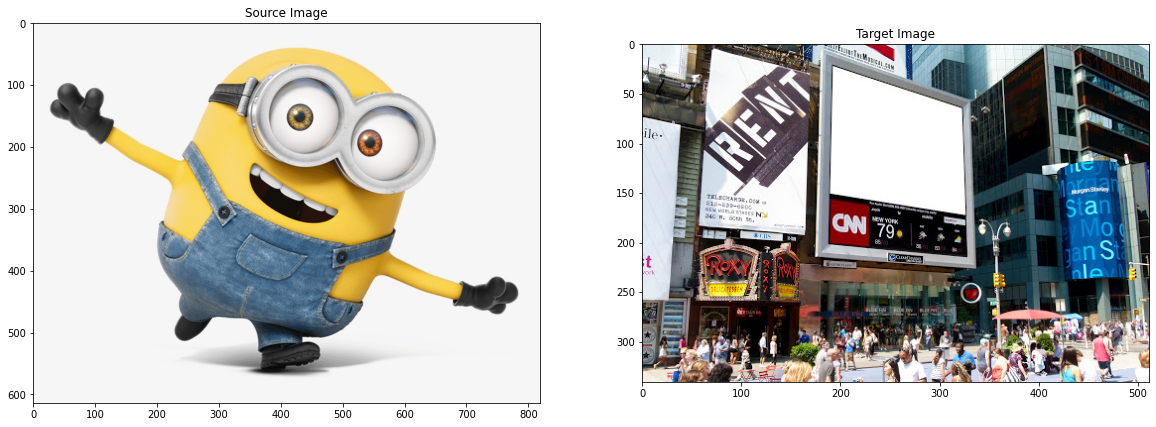

In [21]:
minion_coordinates = a.load_image_get_source_coordinates()
minion_coordinates

After selecting coordinates, press Esc or Q to record the coordinates

In [22]:
billboard_coordinates = a.get_target_coordinates()
billboard_coordinates

[(193, 22), (322, 65), (190, 150), (325, 172)]

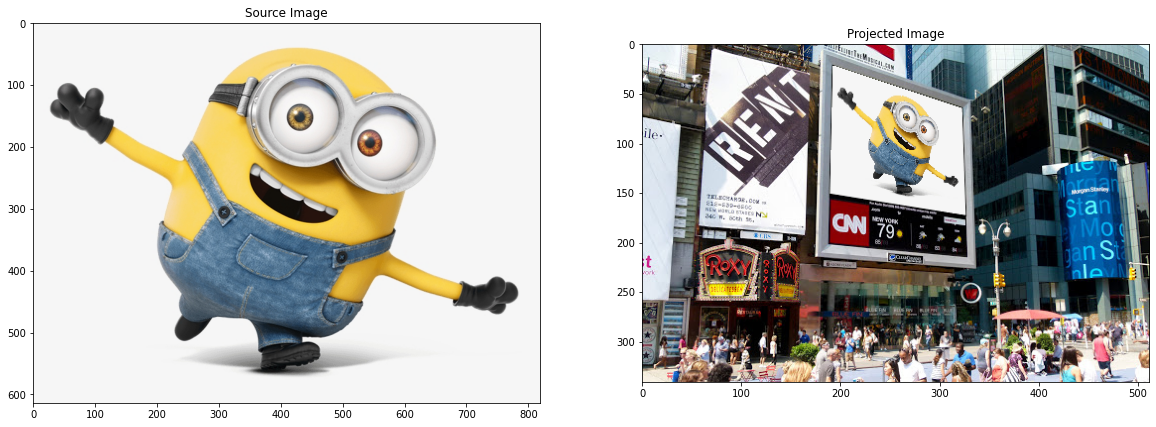

In [23]:
a.perform_homography()

minion_coordinates:  [(0, 0), (860, 0), (0, 770), (860, 770)]


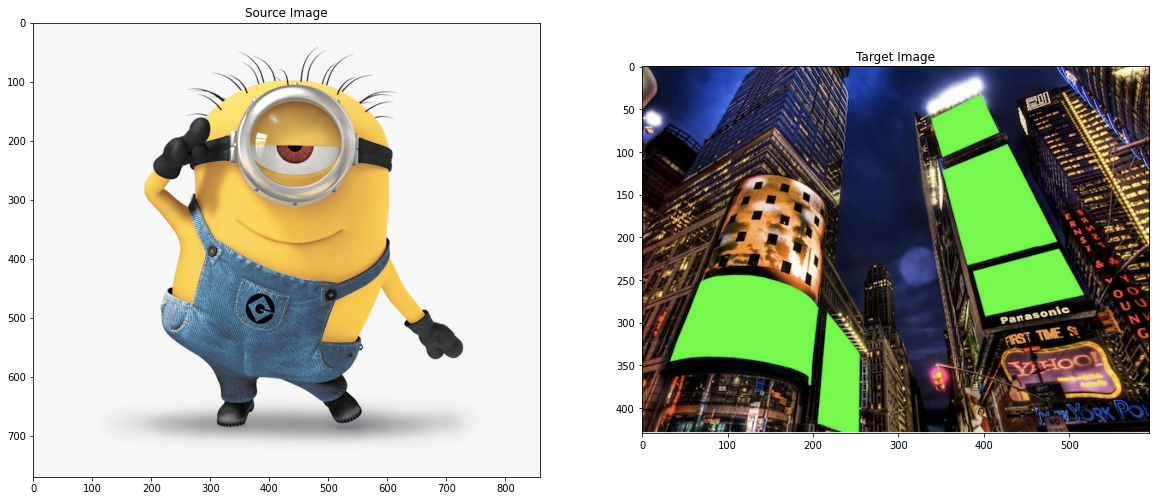

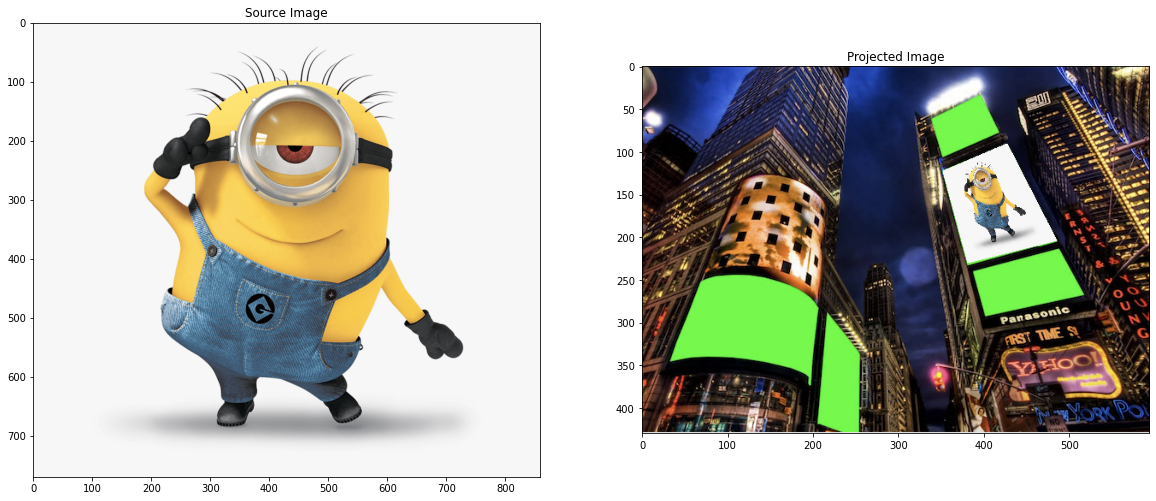

In [24]:
minion_image_path = 'input_images/part1/input/source/happy_minions2.png'
billboard_image_path = 'input_images/part1/input/target/empty_bilboard2.jpg'

b = homography_coordinates(billboard_image_path,minion_image_path)

minion_coordinates = b.load_image_get_source_coordinates()
print("minion_coordinates: ", minion_coordinates)


billboard_coordinates = b.get_target_coordinates()
billboard_coordinates

b.perform_homography()

minion_coordinates:  [(0, 0), (2880, 0), (0, 1800), (2880, 1800)]


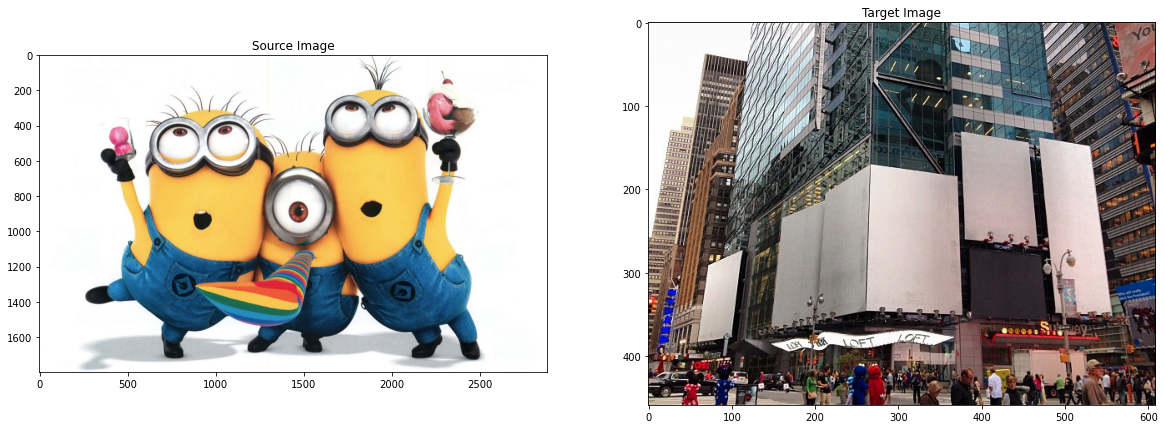

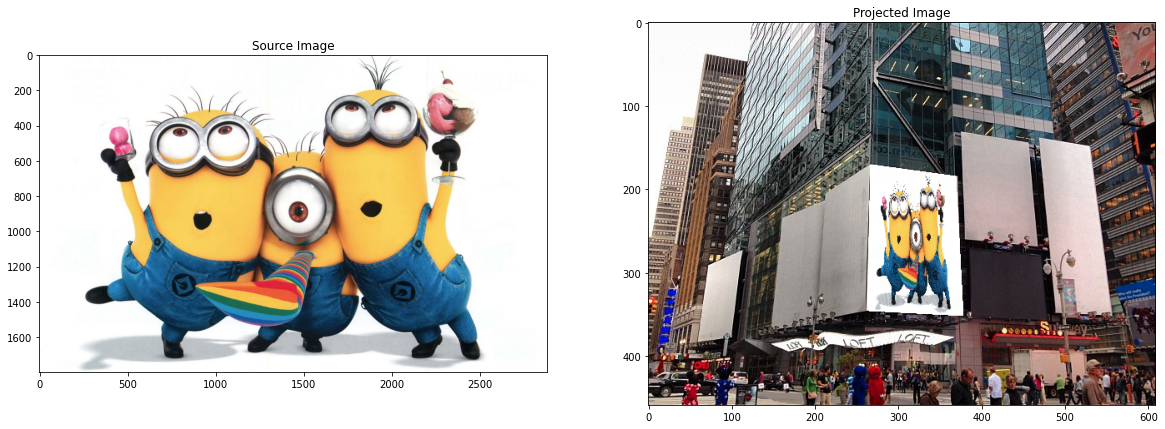

In [26]:
minion_image_path = 'input_images/part1/input/source/happy_minions3.png'
billboard_image_path = 'input_images/part1/input/target/empty_bilboard3.jpg'

c = homography_coordinates(billboard_image_path,minion_image_path)

minion_coordinates = c.load_image_get_source_coordinates()
print("minion_coordinates: ", minion_coordinates)


billboard_coordinates = c.get_target_coordinates()
billboard_coordinates

c.perform_homography()

minion_coordinates:  [(0, 0), (820, 0), (0, 513), (820, 513)]


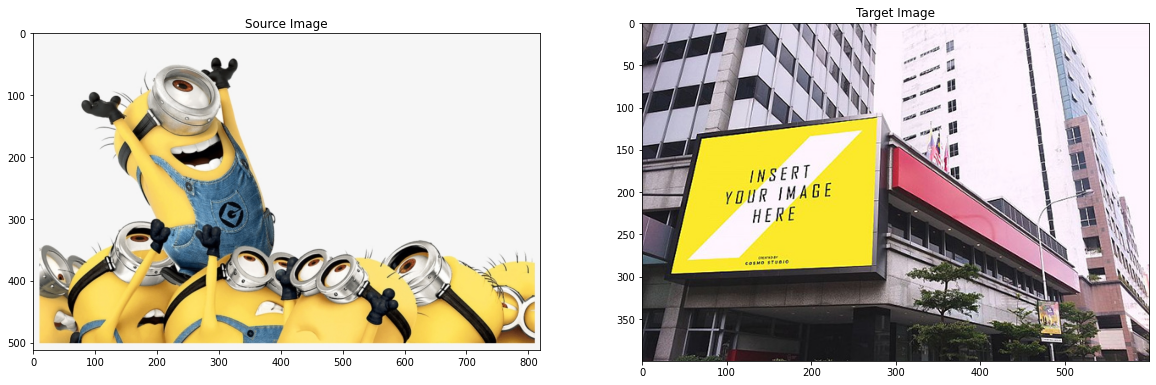

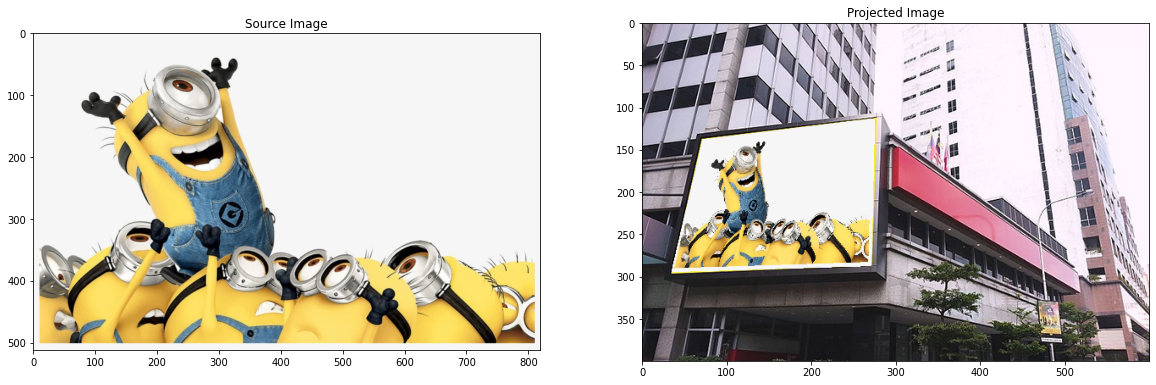

In [28]:
minion_image_path = 'input_images/part1/input/source/happy_minions4.png'
billboard_image_path = 'input_images/part1/input/target/empty_bilboard4.jpg'

d = homography_coordinates(billboard_image_path,minion_image_path)

minion_coordinates = d.load_image_get_source_coordinates()
print("minion_coordinates: ", minion_coordinates)


billboard_coordinates = d.get_target_coordinates()
billboard_coordinates

d.perform_homography()